# Example of SGD usage with [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork

Iris dataset has 4 inputs and 3 classes corresponding 3 Iris species.

In [2]:
X = np.genfromtxt('iris.data', delimiter = ',', usecols = [0,1,2,3])
Y_labels = np.genfromtxt('iris.data', delimiter = ',', usecols = [4], dtype = str) 

X_size, number_of_inputs = X.shape
number_of_outputs = len(set(Y_labels))
n = X.shape[0]
labels = dict(zip(set(Y_labels), np.arange(len(set(Y_labels)))))

Y = np.zeros((X_size, number_of_outputs))
for i in range(X_size):
    Y[i, labels[Y_labels[i]]] = 1

In [3]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
Y[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

First 10 examples. 1 in 3rd position in y corresponds to 3rd class, same with 1st and 2nd.

In [5]:
n = NeuralNetwork.Network((number_of_inputs, 5, number_of_outputs))

Initialize neural network with 4 neurons in input layer, 5 in hidden layer and 3 in output layer. Also, there one hidden neuron in input and hidden layers. All weights are initialized randomly.

In [6]:
X_size = X.shape[0]
train_size = 50
train_ind = np.random.choice(X_size, train_size, replace = False)
test_ind = np.setdiff1d(np.arange(X_size), train_ind)
X_train, Y_train = X[train_ind], Y[train_ind]
X_test, Y_test = X[test_ind], Y[test_ind]

Randomly select 50 examples for training dataset and 100 for testing.

In [7]:
alpha = 0.1
BatchSize = 5

These are learning parameters. alpha is learning rate and BatchSize is size of data batch used to compute gradient.

In [8]:
J = n.SGD(X_train, Y_train, alpha = alpha, BatchSize = BatchSize, eps = 1e-4, MaxIter = 5000)

iteration 1 	 J = 2.0981466898317183
iteration 2 	 J = 1.9699574739889485
iteration 3 	 J = 1.9281799725599427
iteration 4 	 J = 1.9140285821468581
iteration 5 	 J = 1.9084115296497115
iteration 6 	 J = 1.9054683505039314
iteration 7 	 J = 1.9033376659314238
iteration 8 	 J = 1.9013404202790307
iteration 9 	 J = 1.8991313305307664
iteration 10 	 J = 1.8964259577410334
iteration 11 	 J = 1.8928982161378909
iteration 12 	 J = 1.888136633396632
iteration 13 	 J = 1.8816388465244465
iteration 14 	 J = 1.8728487089949122
iteration 15 	 J = 1.861233146081134
iteration 16 	 J = 1.8463797460492288
iteration 17 	 J = 1.828091366449047
iteration 18 	 J = 1.806452315215771
iteration 19 	 J = 1.7818352499086378
iteration 20 	 J = 1.7548338200314881
iteration 21 	 J = 1.7261470412129096
iteration 22 	 J = 1.6964662577208642
iteration 23 	 J = 1.6664007128787959
iteration 24 	 J = 1.6364465432655748
iteration 25 	 J = 1.6069853067910773
iteration 26 	 J = 1.5782965264021196
iteration 27 	 J = 1.5505

Perform gradient descent to fit parameters. eps = 1e-4 means that algorithm stops when absolute difference in cost function values between two iterations is less than 0.0001.

In [9]:
accuracy_train = 0
for k in range(len(Y_train)):
    accuracy_train += np.argmax(n.h(X_train[k])) == np.argmax(Y_train[k])
print(f"\naccuracy on train = {accuracy_train/len(Y_train)} ({accuracy_train}/{len(Y_train)})")

accuracy_test = 0
for k in range(len(Y_test)):
    #print(n.h(X_test[k]), np.argmax(n.h(X_test[k])) == np.argmax(Y_test[k]))
    accuracy_test += np.argmax(n.h(X_test[k])) == np.argmax(Y_test[k])
print(f"accuracy on test = {accuracy_test/len(Y_test)} ({accuracy_test}/{len(Y_test)})")


accuracy on train = 0.98 (49/50)
accuracy on test = 0.97 (97/100)


Check accuracy on training and testing datasets.

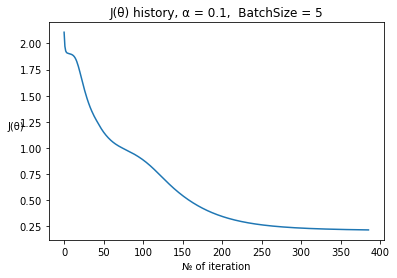

In [10]:
plt.plot(J)
plt.title(f'J(θ) history, α = {alpha},  BatchSize = {BatchSize}')
plt.xlabel('№ of iteration')
plt.ylabel('J(θ)', rotation = 0)
plt.show()

Plot cost function J values depending on number of iteration.

In [11]:
demo_index = np.random.choice(X_size, 10, replace = False)
np.set_printoptions(suppress=True)
print("neural network output \t\t\t correct output \t equals?")
for i in demo_index:
    print(f"{n.h(X[i])} \t {Y[i]} \t\t {np.argmax(n.h(X[i])) == np.argmax(Y[i])}")


neural network output 			 correct output 	 equals?
[0.08260593 0.93527706 0.00114631] 	 [0. 1. 0.] 		 True
[0.09644805 0.92169714 0.00123249] 	 [0. 1. 0.] 		 True
[0.02282261 0.00012293 0.98924652] 	 [0. 0. 1.] 		 True
[0.94049037 0.02978537 0.00945051] 	 [1. 0. 0.] 		 True
[0.01751903 0.00011041 0.99140748] 	 [0. 0. 1.] 		 True
[0.01700505 0.00010926 0.99165668] 	 [0. 0. 1.] 		 True
[0.01887376 0.00011331 0.99094359] 	 [0. 0. 1.] 		 True
[0.08450274 0.9334753  0.00115763] 	 [0. 1. 0.] 		 True
[0.96833573 0.01243025 0.01349057] 	 [1. 0. 0.] 		 True
[0.9676477  0.01364816 0.01263976] 	 [1. 0. 0.] 		 True


Compare some neural network outputs with correct ones.